In [1]:
import pandas as pd
#from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
X = df.iloc[:,2:8]
y = df.iloc[:,8]

In [8]:
X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,18.0,697.0,150.0,356.0,114.0,2.5568
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,18.0,1860.0,409.0,741.0,349.0,1.8672


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [11]:
rt = DecisionTreeRegressor(criterion = 'absolute_error', max_depth=2)

In [12]:
rt.fit(X_train,y_train)

,criterion,'absolute_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [13]:
y_pred = rt.predict(X_test)

In [14]:
r2_score(y_test,y_pred)

0.38233995916331487

# Hyperparameter Tuning

In [15]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['squared_error','absolute_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [16]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [17]:
reg.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [2, 4, ...], 'max_features': [0.25, 0.5, ...], 'min_samples_split': [0.25, 0.5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [21]:
reg.best_score_

0.4241061557927872

In [22]:
reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_split': 0.25}

# Feature Importance

In [23]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)

median_income 0.8748367427838336
housing_median_age 0.09480995022237818
total_bedrooms 0.010539949588997257
total_rooms 0.010328698146194044
households 0.008226447837141241
population 0.0012582114214555774


In [31]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams

[Text(0.5, 0.8333333333333334, 'x[5] <= 5.029\nabsolute_error = 88591.787\nsamples = 16512\nvalue = 179850.0'),
 Text(0.25, 0.5, 'x[5] <= 2.831\nabsolute_error = 67270.892\nsamples = 12939\nvalue = 157200.0'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'absolute_error = 50997.952\nsamples = 5260\nvalue = 112000.0'),
 Text(0.375, 0.16666666666666666, 'absolute_error = 66533.682\nsamples = 7679\nvalue = 183900.0'),
 Text(0.75, 0.5, 'x[5] <= 7.643\nabsolute_error = 93494.24\nsamples = 3573\nvalue = 315600.0'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'absolute_error = 77989.392\nsamples = 2883\nvalue = 286200.0'),
 Text(0.875, 0.16666666666666666, 'absolute_error = 47785.777\nsamples = 690\nvalue = 500001.0')]

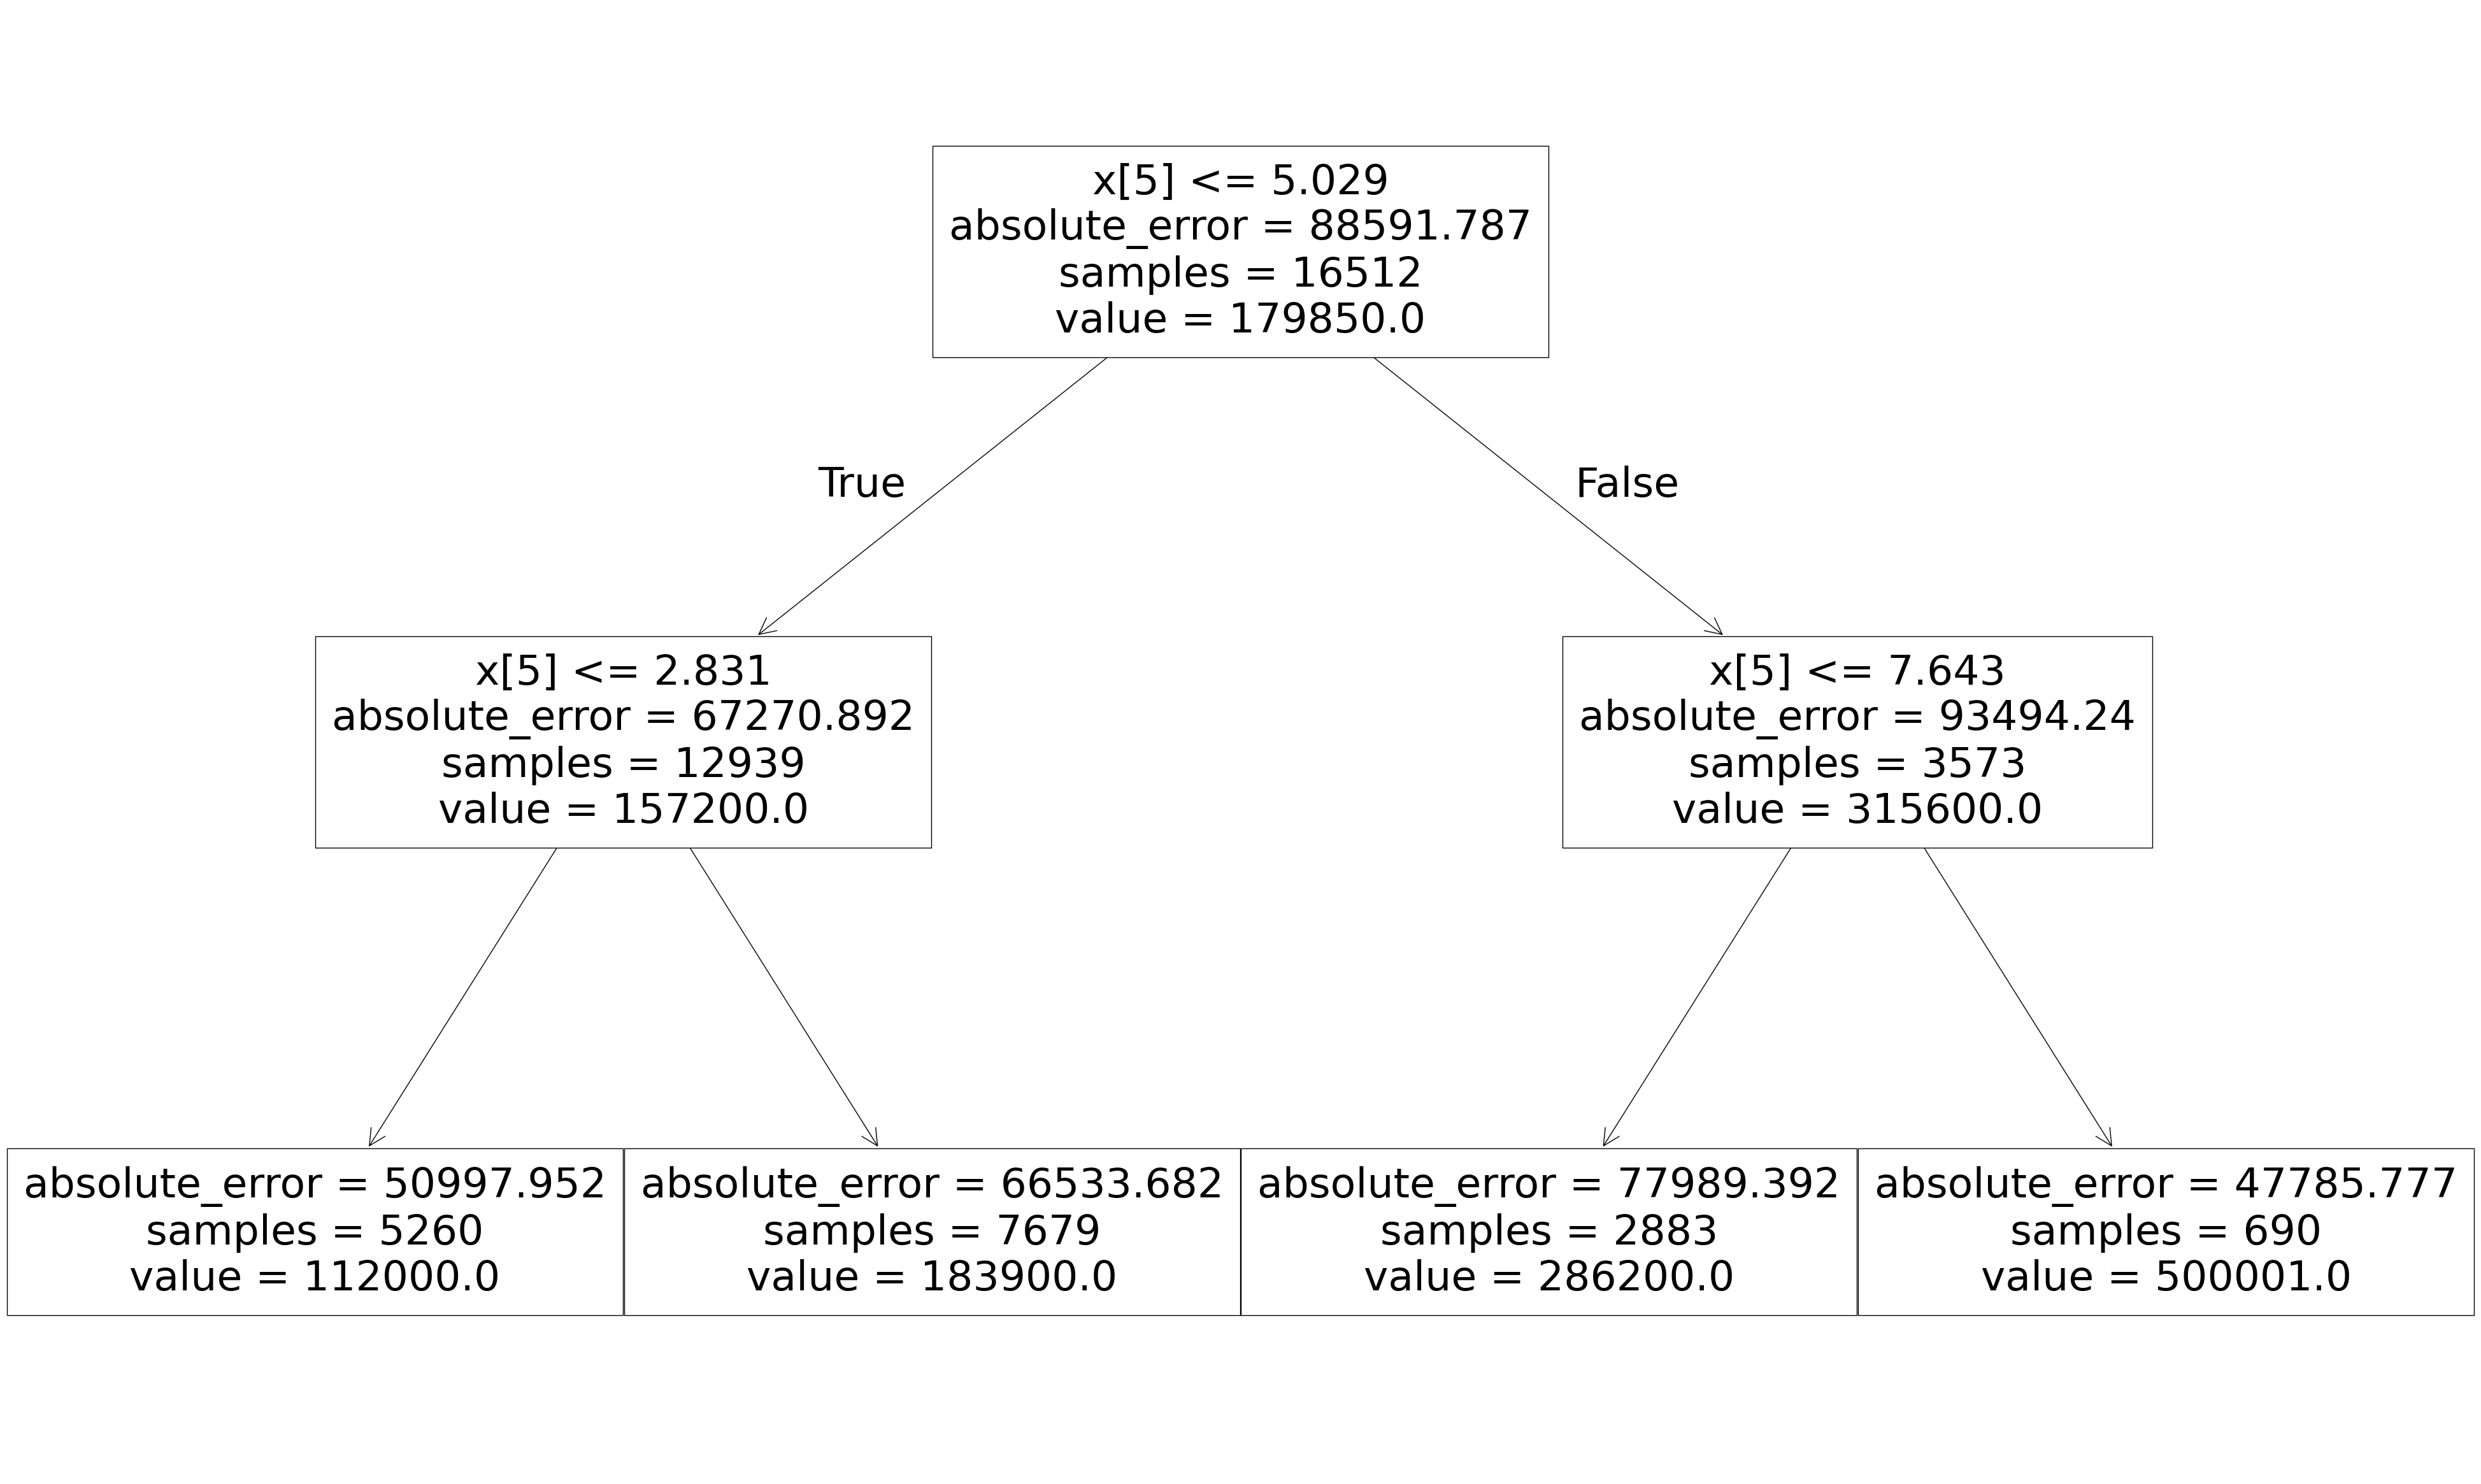

In [32]:
rcParams['figure.figsize'] = 50,30

plot_tree(rt)